<a href="https://colab.research.google.com/github/SeptiLutfiana/GoReader-Kelompok5/blob/main/Test_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python
!sudo apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [48]:
import cv2 as cv
import numpy as np
import pytesseract as tsr
from matplotlib import pyplot as plt
import imutils

In [72]:
IMG_DIR = '/content/drive/MyDrive/Images/Angka.jpg'

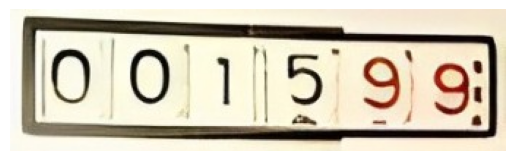

In [73]:
# Load image
image = cv.imread(IMG_DIR)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

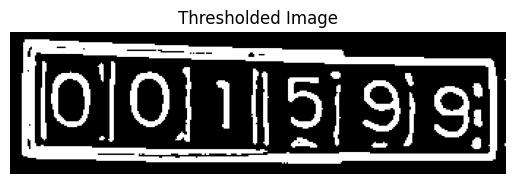

In [74]:
# Convert to grayscale
gray = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)

# Apply GaussianBlur to reduce noise
blur = cv.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding
thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)

# Debug: Display thresholded image
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title('Thresholded Image')
plt.show()

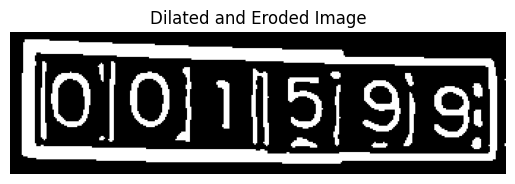

In [75]:
# Morphological operations
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
dilation = cv.dilate(thresh, kernel, iterations=1)
erosion = cv.erode(dilation, kernel, iterations=1)

# Debug: Display dilated and eroded image
plt.imshow(erosion, cmap='gray')
plt.axis('off')
plt.title('Dilated and Eroded Image')
plt.show()

In [76]:
# Find contours
cnts = cv.findContours(erosion.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

nums = []
for c in cnts:
    (x, y, w, h) = cv.boundingRect(c)
    if w >= 15 and h > 50:  # Adjusted to include more potential digits
        nums.append(c)
nums = np.vstack([nums[i] for i in range(len(nums))])
null = cv.convexHull(nums)

mask = np.zeros(erosion.shape[:2], dtype='uint8')
cv.drawContours(mask, [null], -1, 255, -1)
mask = cv.dilate(mask, None, iterations=2)

final = cv.bitwise_and(erosion, erosion, mask=mask)

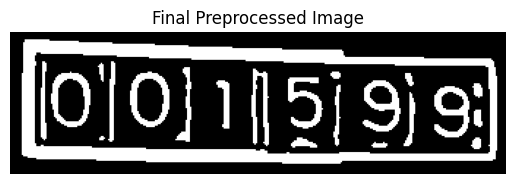

Teks Hasil Bacaan Angka:  0015993



In [77]:
# Debug: Display final preprocessed image
plt.imshow(final, cmap='gray')
plt.axis('off')
plt.title('Final Preprocessed Image')
plt.show()

# Detect text using Tesseract OCR
config = "--psm 11 -c tessedit_char_whitelist=0123456789"
text = tsr.image_to_string(final, config=config)
print("Teks Hasil Bacaan Angka: ", text)